<a href="https://colab.research.google.com/github/Baldros/BirdCLEFF-2024/blob/main/BirdCLEF_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    O objetivo desse código é executar uma Análise Exploratória de Dados
    para se entender melhor o conjunto de dados a fim de se analisar a
    qualidade do conjunto de dados fornecidos e se intuir adequadamente
    possiveis abordagens que melhor seriam dado o conjunto de dados.

Dados: https://www.kaggle.com/competitions/birdclef-2024/data

# Aquisitando dados:

    Devido a minha falta de espaço no computador pessoal, eu copiei
    os arquivos da competição direto para o notebook do colab, de modo
    a usar o armazenamento do Google e não precisar usar o meu armazenamento
    pessoal.




Nota:

    Para conseguir baixar os dados, precisa-se ter o kaggle.json, que é
    um arquivo json com informações de usuário do kaggle, como usuário e
    senha. Sem ele, não é possivel baixar os dados. Para conseguir o seu
    arquivo kaggle.json, basta criar um token.


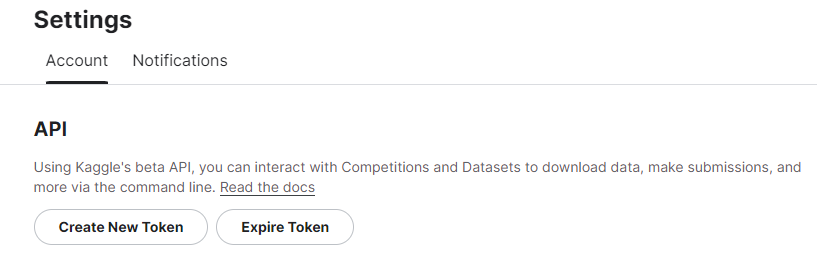

Validando Comunicação com o Drive:

    O meu Kaggle.json está no drive, que eu já deixo lá para
    facilitar todo esse processo de comunicação entre ecossistemas.

In [ ]:
# Importação para comunicação com o Drive:
from google.colab import drive
from time import sleep

# Acessando o Drive:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando conteudos do drive:

In [ ]:
# Criando um diretório:
!mkdir -p /root/.kaggle

# Kaggle Json:
!cp '/content/drive/MyDrive/kaggle.json' "/root/.kaggle/"

# Baixando os dados:
!ls "/root/.kaggle/"

kaggle.json


Baixando arquivos:

In [ ]:
!kaggle competitions download -c birdclef-2024

100% 21.8G/21.8G [05:56<00:00, 94.1MB/s]
100% 21.8G/21.8G [05:56<00:00, 65.6MB/s]


**Descompactando arquivos**

In [ ]:
# Importa a biblioteca para manipulação de arquivos
from tqdm import tqdm
import zipfile

In [ ]:
# Define o caminho para o arquivo ZIP baixado
zip_file_path = "/content/birdclef-2024.zip"

# Define o diretório de destino para a extração
extract_dir = "/content/birdclef-2024"

# Extraindo arquivo:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Obtenha uma lista dos nomes dos arquivos no arquivo zip
    file_list = zip_ref.namelist()
    # Use tqdm para criar uma barra de progressão
    for file in tqdm(file_list, desc="Extracting"):
        zip_ref.extract(file, extract_dir)

Extracting: 100%|██████████| 32907/32907 [04:51<00:00, 112.89it/s]


# Dados Tabulares:

    Os arquivos tabulares aqui não são arquivos auxiliares que contextualizam
    os dados principais, que são os dados de audio, não tabulares,
    que serão utilizados no processo de treinamento do modelo.

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Tabela eBird_Taxonomy_v2021:

    O aquivo "eBird_Taxonomy_v2021.csv" versa sobre dados ornitológicos,
    dados relacionádos a espécie, nome ciêntifico, familia, etc. Talvez
    seja uma tabela interessante para o algorítmo de classificação.

In [ ]:
# Importando tabelas:
df_ebird = pd.read_csv('/content/birdclef-2024/eBird_Taxonomy_v2021.csv');df_ebird.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [ ]:
# Informações:
df_ebird.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16753 entries, 0 to 16752
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TAXON_ORDER       16753 non-null  int64 
 1   CATEGORY          16753 non-null  object
 2   SPECIES_CODE      16753 non-null  object
 3   PRIMARY_COM_NAME  16753 non-null  object
 4   SCI_NAME          16753 non-null  object
 5   ORDER1            16751 non-null  object
 6   FAMILY            16740 non-null  object
 7   SPECIES_GROUP     216 non-null    object
 8   REPORT_AS         3876 non-null   object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


**Checando NaN**

In [ ]:
# Calculando a quantidade de valores NaN em cada coluna
quantidade_nan_por_coluna = df_ebird.isna().sum()

# Calcular a porcentagem de valores NaN em cada coluna
total_linhas = len(df_ebird)
porcentagem_nan_por_coluna = (quantidade_nan_por_coluna / total_linhas) * 100

# Exibir os resultados
for coluna, quantidade_nan, porcentagem_nan in zip(quantidade_nan_por_coluna.index, quantidade_nan_por_coluna.values, porcentagem_nan_por_coluna.values):
  if quantidade_nan !=0:
    print(f"Na coluna \033[1m'{coluna}'\033[0m, existem \033[1m{quantidade_nan}\033[0m valores NaN, representando \033[1m{porcentagem_nan:.2f}%\033[0m da coluna.")

Na coluna 'ORDER1', existem 2 valores NaN, representando 0.01% da coluna.
Na coluna 'FAMILY', existem 13 valores NaN, representando 0.08% da coluna.
Na coluna 'SPECIES_GROUP', existem 16537 valores NaN, representando 98.71% da coluna.
Na coluna 'REPORT_AS', existem 12877 valores NaN, representando 76.86% da coluna.


    Podemos visualizar essa informação de forma gráfica também.

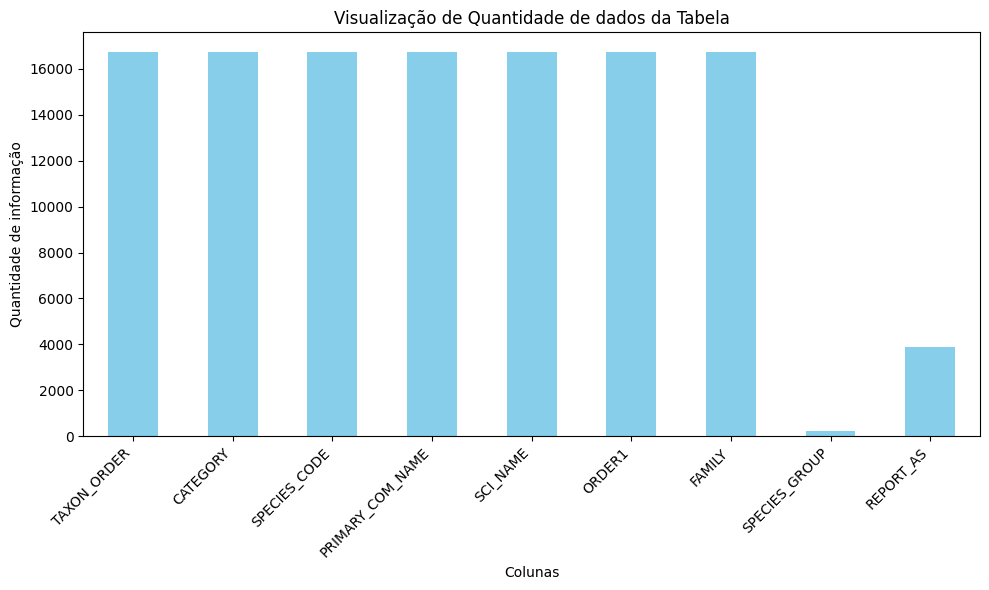

In [ ]:
# Contando o número de valores não-NaN em cada coluna
quantidade_nao_nan_por_coluna = df_ebird.notna().sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
quantidade_nao_nan_por_coluna.plot(kind='bar', color='skyblue')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de informação')
plt.title('Visualização de Quantidade de dados da Tabela')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Checando possibilidade de Classes**

    A ideia aqui é checar se há alguma coluna podemos que podemos
    agrupar seus elementos de modo a interpreta-los como como classes.



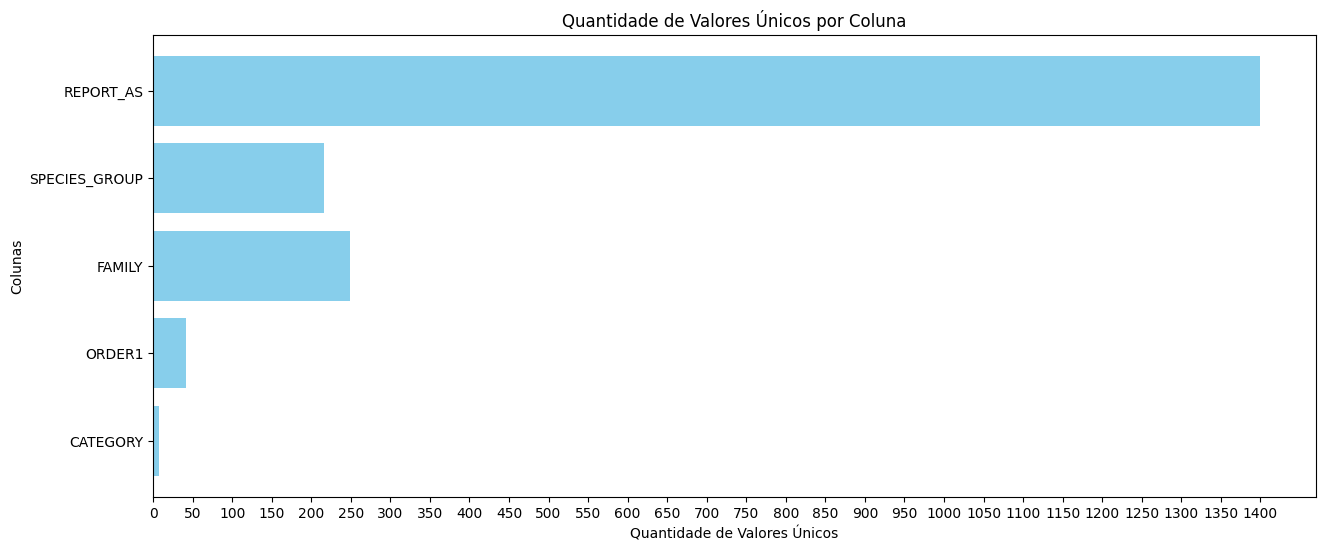

In [ ]:
# Lista para armazenar os nomes das colunas com valores únicos
colunas_com_valores_unicos = []

# Lista para armazenar a quantidade de valores únicos em cada coluna
quantidade_valores_unicos = []

# Iterar sobre as colunas do DataFrame
for coluna in df_ebird.columns:
    qtd_contagem = len(df_ebird[coluna].value_counts())
    if qtd_contagem != len(df_ebird):
        colunas_com_valores_unicos.append(coluna)
        quantidade_valores_unicos.append(qtd_contagem)

# Criar o gráfico de barras
plt.figure(figsize=(15, 6))
plt.barh(colunas_com_valores_unicos, quantidade_valores_unicos, color='skyblue')
plt.xlabel('Quantidade de Valores Únicos')
plt.ylabel('Colunas')
plt.title('Quantidade de Valores Únicos por Coluna')

# Definido a escala do eixo x
ticks_x = range(0, max(quantidade_valores_unicos) + 1, 50)
plt.xticks(ticks_x)

plt.show()

## sample_submission:

O arquivo "sample_submission.csv" contém uma amostra de submissão válida.

1. row_id: Um identificador para a predição no formato de "soundscape_[soundscape_id]_[end_time]".
2. [bird_id]: Existem 182 colunas de identificação de pássaros. Você precisará prever a probabilidade da presença de cada pássaro para cada linha.


    Não entendi muito bem essa tabela não, pra ser sincero.

In [ ]:
# Importando tabelas:
df_sb = pd.read_csv('/content/birdclef-2024/sample_submission.csv');df_sb

,row_id,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1
0,soundscape_1446779_5,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,...,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495
1,soundscape_1446779_10,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,...,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495
2,soundscape_1446779_15,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,...,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495,0.005495


In [ ]:
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 183 entries, row_id to zitcis1
dtypes: float64(182), object(1)
memory usage: 4.4+ KB


In [ ]:
df_sb.describe()

,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,barswa,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1
count,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
mean,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,...,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03
std,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,...,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18,1.062297e-18
min,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,...,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03
25%,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,...,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03
50%,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,...,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03
75%,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,...,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03
max,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,...,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03,5.494505e-03


## train_metadata:

O arquivo "train_metadata.csv" fornece uma ampla gama de metadados para os dados de treinamento. Os campos mais diretamente relevantes são:

1. primary_label: um código para a espécie de pássaro. Você pode revisar informações detalhadas sobre os códigos de pássaros ao acrescentar o código 2. à URL https://ebird.org/species/, como por exemplo https://ebird.org/species/amecro para o Corvo Americano. Nem todas as espécies têm suas próprias páginas; alguns links podem falhar.
3. latitude e longitude: coordenadas do local onde a gravação foi feita. Algumas espécies de pássaros podem ter 'dialetos' de chamadas locais, então pode ser útil buscar diversidade geográfica nos seus dados de treinamento.
4. author: o usuário que forneceu a gravação.
5. filename: o nome do arquivo de áudio associado.

In [ ]:
# Importando tabelas:
df_train_md = pd.read_csv('/content/birdclef-2024/train_metadata.csv');df_train_md.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


In [ ]:
df_train_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24459 entries, 0 to 24458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     24459 non-null  object 
 1   secondary_labels  24459 non-null  object 
 2   type              24459 non-null  object 
 3   latitude          24081 non-null  float64
 4   longitude         24081 non-null  float64
 5   scientific_name   24459 non-null  object 
 6   common_name       24459 non-null  object 
 7   author            24459 non-null  object 
 8   license           24459 non-null  object 
 9   rating            24459 non-null  float64
 10  url               24459 non-null  object 
 11  filename          24459 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.2+ MB


# Dados Não tabulares:

    O nosso real dado de treino, arquivos de audio na extensão
    ".ogg" que gravam capturas feitas por ornitólogos na natureza. Sem
    tratamento, sem tabelas... O áudio cru.

In [ ]:
# Importações:
import librosa
import numpy as np
from IPython.display import Audio

In [ ]:
def analise_audio(audio_path, espectrograma_Frequência = False):
  '''
    Função construida para axusilio da análise visual dos
  dados de áudio fornecidos para treinamento do modelo. Fornece
  gráficos, saída sonora e as informações de sinal e taxa de
  amostragem do arquivo de audio.

  Entrada:
  - String: Diretório onde está o arquivo;
  - Boolean: Possibilita a construção de um
  espectrograma de frequência adicional.

  Saída:
  - y: um array unidimensional que representa o sinal de áudio.
  - sr: Taxa de amostragem (sampling rate) do sinal de áudio,
  expressaem Hz (amostras por segundo).
  '''

  #-----------------------------
  # Análise Visual:
  #-----------------------------

  # Extraindo y=sinal, sr=taxa de amostragem:
  y, sr = librosa.load(audio_path)

  ## Extraindo recursos de áudio
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

  ## Espectrograma de Frequência
  D = np.abs(librosa.stft(y))
  log_power = librosa.amplitude_to_db(D, ref=np.max)

  # Estruturando Gráficos:
  fig, axs = plt.subplots(2, 2, figsize=(12, 10))

  # Espectrograma de Mel
  axs[0, 0].set_title('Mel Spectrogram')
  img = librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', sr=sr, hop_length=512, x_axis='time', ax=axs[0, 0])
  fig.colorbar(img, ax=axs[0, 0], format='%+2.0f dB')

  # Espectrograma de Frequência
  axs[0, 1].set_title('Espectrograma de Frequência')
  librosa.display.specshow(log_power, sr=sr, x_axis='time', y_axis='hz', ax=axs[0, 1])
  axs[0, 1].set_xlabel('Tempo')
  axs[0, 1].set_ylabel('Frequência (Hz)')

  # Forma de onda
  axs[1, 0].set_title('Waveform')
  axs[1, 0].plot(y)
  axs[1, 0].set_xlabel('Amostras')
  axs[1, 0].set_ylabel('Amplitude')

  # Histograma da energia do espectrograma de Mel
  axs[1, 1].set_title('Histograma de Energia do Espectrograma de Mel')
  axs[1, 1].hist(mel_spectrogram.ravel(), bins=30, log=True)
  axs[1, 1].set_xlabel('Energia')
  axs[1, 1].set_ylabel('Frequência')

  # Ajustes de layout
  plt.tight_layout()

  # Exibição do plot
  plt.show()

  if espectrograma_Frequência:
    # Calculando o espectrograma de frequência
    D = np.abs(librosa.stft(y)) # Calcula a Transformada de Fourier de Curto Tempo (STFT) do sinal de áudio;
    log_power = librosa.amplitude_to_db(D, ref=np.max) # Converter a magnitude do espectrograma de frequência para decibéis (dB).

    # Calcular o histograma da energia do espectrograma de frequência
    hist_freq_spec = np.histogram(log_power.ravel(), bins=30) # Calcular o histograma dos valores de intensidade do espectrograma de frequência em escala logarítmica.

    # Plotar o histograma
    plt.figure(figsize=(8, 4))
    plt.bar(hist_freq_spec[1][:-1], hist_freq_spec[0], width=np.diff(hist_freq_spec[1]), align='edge', color='skyblue', edgecolor='black')
    plt.title('Histograma de Energia do Espectrograma de Frequência')
    plt.xlabel('Energia (dB)')
    plt.ylabel('Frequência')
    plt.yscale('log')
    plt.show()

  #-------------------
  # Análise Auditiva:
  #--------------------

  # Reproduza o áudio
  Audio(y, rate=sr)

  # Saída:
  return y,sr

In [ ]:
def play_audio(audio_path):
  #-------------------
  # Análise Auditiva:
  #--------------------

  # Reproduza o áudio
  Audio(audio_path)

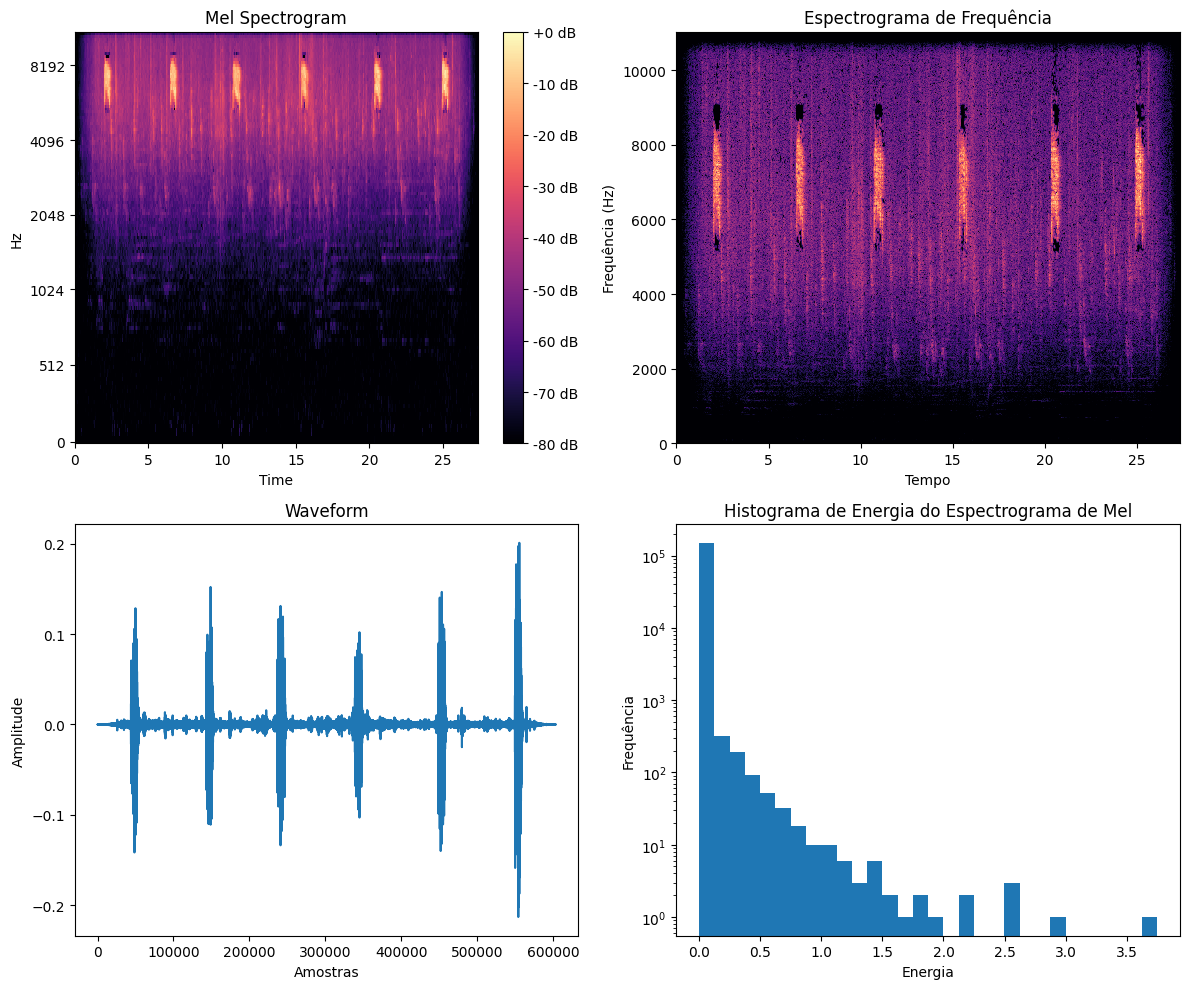

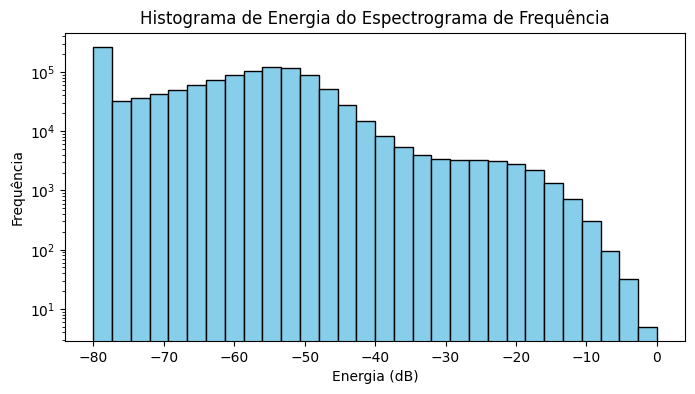

In [ ]:
# Carregando arquivo individual:
audio_file = "/content/birdclef-2024/train_audio/asbfly/XC134896.ogg"
_,_ = analise_audio(audio_file, espectrograma_Frequência = True)
Audio(audio_file)

**Analisando uma amostra dos dados**

    Poderiamos querer analisar um exemplar de cada
    espécime nos dada no conjunto de dados de treino.

In [ ]:
# Bibliotecas utilizadas:
import os
import glob
from tqdm import tqdm

In [ ]:
# Diretório principal
diretorio_principal = "/content/birdclef-2024/train_audio"

**Contagem de arquivos por pasta**

In [ ]:
# Contagem de arquivos por pasta (Se sim, trocar para True)?
count_por_pasta = True

# Dicionário para armazenar o número de arquivos de áudio em cada pasta
contagem_arquivos_por_pasta = {}

# Contagem total de arquivos
contagem_total_arquivos = 0

# Percorrer os subdiretórios dentro do diretório principal
for diretorio in os.listdir(diretorio_principal):
    caminho_completo = os.path.join(diretorio_principal, diretorio)

    # Verificar se o caminho é um diretório
    if os.path.isdir(caminho_completo):
        # Encontrar todos os arquivos de áudio dentro do subdiretório
        arquivos_audio = glob.glob(os.path.join(caminho_completo, "*.ogg"))  # Altere "*.wav" para o formato dos seus arquivos de áudio
        num_arquivos = len(arquivos_audio)
        contagem_arquivos_por_pasta[diretorio] = num_arquivos
        contagem_total_arquivos += num_arquivos

# Contagem total de arquivos
print(f"A quantidade total de \033[1m{contagem_total_arquivos}\033[0m arquivos de áudio.")

# Contagem de arquivos por pasta:
if count_por_pasta:
  for pasta, num_arquivos in contagem_arquivos_por_pasta.items():
      print(f"A pasta \033[1m'{pasta}'\033[0m contém \033[1m{num_arquivos}\033[0m arquivo(s) de áudio.")

A quantidade total de 24459 arquivos de áudio.
A pasta 'gybpri1' contém 115 arquivo(s) de áudio.
A pasta 'brwjac1' contém 20 arquivo(s) de áudio.
A pasta 'compea' contém 70 arquivo(s) de áudio.
A pasta 'kerlau2' contém 14 arquivo(s) de áudio.
A pasta 'integr' contém 5 arquivo(s) de áudio.
A pasta 'pabflo1' contém 47 arquivo(s) de áudio.
A pasta 'brasta1' contém 13 arquivo(s) de áudio.
A pasta 'grynig2' contém 20 arquivo(s) de áudio.
A pasta 'gargan' contém 163 arquivo(s) de áudio.
A pasta 'commyn' contém 237 arquivo(s) de áudio.
A pasta 'brakit1' contém 44 arquivo(s) de áudio.
A pasta 'vehpar1' contém 36 arquivo(s) de áudio.
A pasta 'dafbab1' contém 22 arquivo(s) de áudio.
A pasta 'whbbul2' contém 52 arquivo(s) de áudio.
A pasta 'bwfshr1' contém 31 arquivo(s) de áudio.
A pasta 'piekin1' contém 137 arquivo(s) de áudio.
A pasta 'emedov2' contém 53 arquivo(s) de áudio.
A pasta 'grewar3' contém 500 arquivo(s) de áudio.
A pasta 'bkwsti' contém 500 arquivo(s) de áudio.
A pasta 'comkin1' cont

**Analisando exemplar de cada tipo de pássaro fornecido**

In [ ]:
# Lista para armazenar os paths dos primeiros arquivos de cada subdiretório
primeiros_arquivos = []

# Percorrer os subdiretórios dentro do diretório principal
for diretorio in os.listdir(diretorio_principal):
    caminho_completo = os.path.join(diretorio_principal, diretorio)

    # Verificar se o caminho é um diretório
    if os.path.isdir(caminho_completo):
        # Encontrar o primeiro arquivo de áudio dentro do subdiretório
        arquivos_audio = glob.glob(os.path.join(caminho_completo, "*.ogg"))  # Altere "*.wav" para o formato dos seus arquivos de áudio
        if arquivos_audio:
            primeiro_arquivo = arquivos_audio[0]
            primeiros_arquivos.append(primeiro_arquivo)

# Exibir a lista de paths dos primeiros arquivos de áudio de cada subdiretório
print(primeiros_arquivos)
print(len(primeiros_arquivos))

['/content/birdclef-2024/train_audio/gybpri1/XC487793.ogg', '/content/birdclef-2024/train_audio/brwjac1/XC604402.ogg', '/content/birdclef-2024/train_audio/compea/XC208327.ogg', '/content/birdclef-2024/train_audio/kerlau2/XC856451.ogg', '/content/birdclef-2024/train_audio/integr/XC401712.ogg', '/content/birdclef-2024/train_audio/pabflo1/XC741594.ogg', '/content/birdclef-2024/train_audio/brasta1/XC443646.ogg', '/content/birdclef-2024/train_audio/grynig2/XC575163.ogg', '/content/birdclef-2024/train_audio/gargan/XC807089.ogg', '/content/birdclef-2024/train_audio/commyn/XC110969.ogg', '/content/birdclef-2024/train_audio/brakit1/XC575565.ogg', '/content/birdclef-2024/train_audio/vehpar1/XC497100.ogg', '/content/birdclef-2024/train_audio/dafbab1/XC187068.ogg', '/content/birdclef-2024/train_audio/whbbul2/XC209565.ogg', '/content/birdclef-2024/train_audio/bwfshr1/XC73029.ogg', '/content/birdclef-2024/train_audio/piekin1/XC74071.ogg', '/content/birdclef-2024/train_audio/emedov2/XC167080.ogg', '/

In [ ]:
for arq in tqdm(primeiros_arquivos):
  _,_ = analise_audio(arq, espectrograma_Frequência = True)
  Audio(arq)